In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams
import seaborn as sns

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [ ]:
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import GlobalMaxPooling2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Add
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train_image="/content/drive/MyDrive/data/training/"

In [ ]:
x_train_label="/content/drive/MyDrive/data/labels_training.csv"

In [ ]:
pd.read_csv(x_train_label).head(10)

,id,label
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1
5,5,0
6,6,1
7,7,0
8,8,1
9,9,0


In [ ]:
pd.read_csv(x_train_label).tail()

,id,label
1495,1495,0
1496,1496,1
1497,1497,0
1498,1498,0
1499,1499,1


In [ ]:
def load_data(dir_data, dir_label):
  #dir_data is the data directory
  #dir_labels=csv file that contains ids and labels
  #returns the array of all images and its labels
  label_pd=pd.read_csv(x_train_label)
  ids=label_pd.id.values
  data=[]
  for identifier in ids:
    fname=dir_data+identifier.astype(str)+'.tif'
    image= mpl.image.imread(fname)
    data.append(image)
  data=np.array(data)
  label = label_pd.label.values
  return data, label


In [ ]:
#load the training data
x,y = load_data(x_train_image,x_train_label)


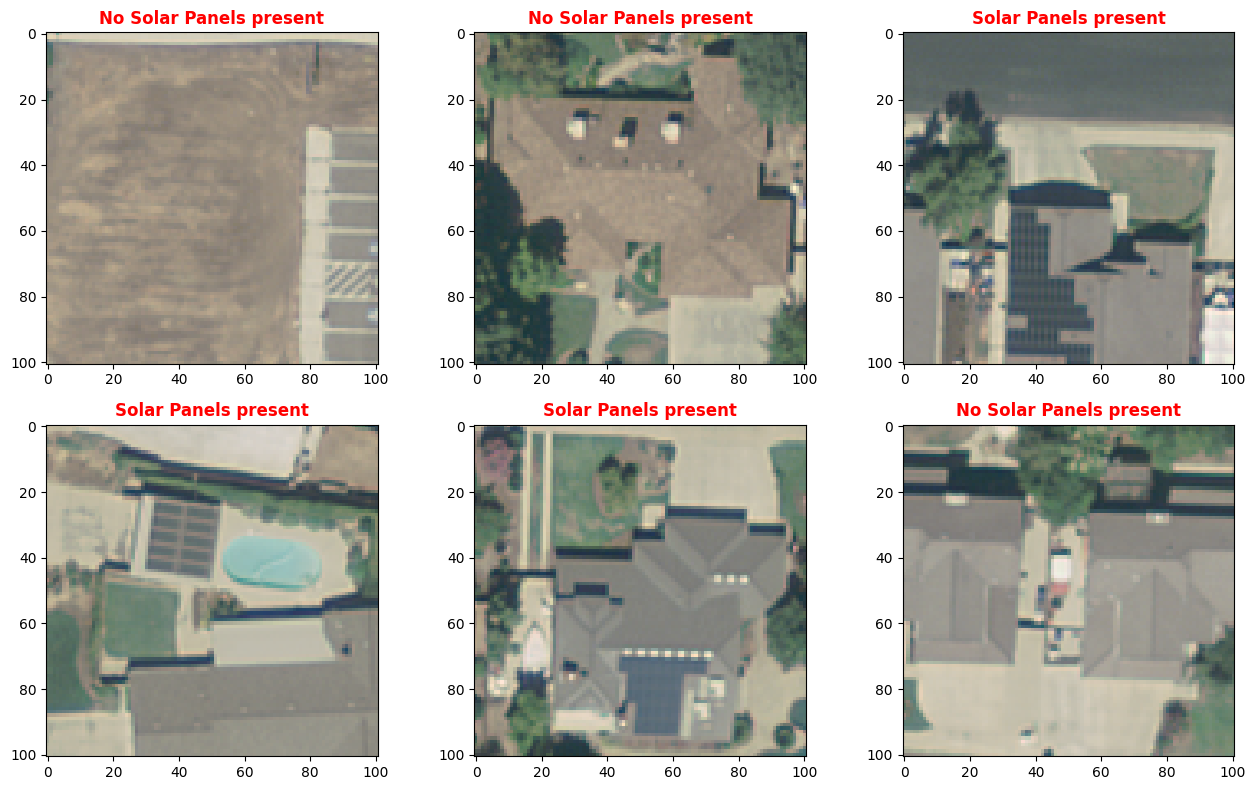

In [ ]:
#dispay images with and without solar panels
plt.figure(figsize = (13,8))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x[i])
  if y[i] == 0:
    title="No Solar Panels present"
  else:
    title="Solar Panels present"
  plt.title(title,color='r',weight='bold')
plt.tight_layout()
plt.show()

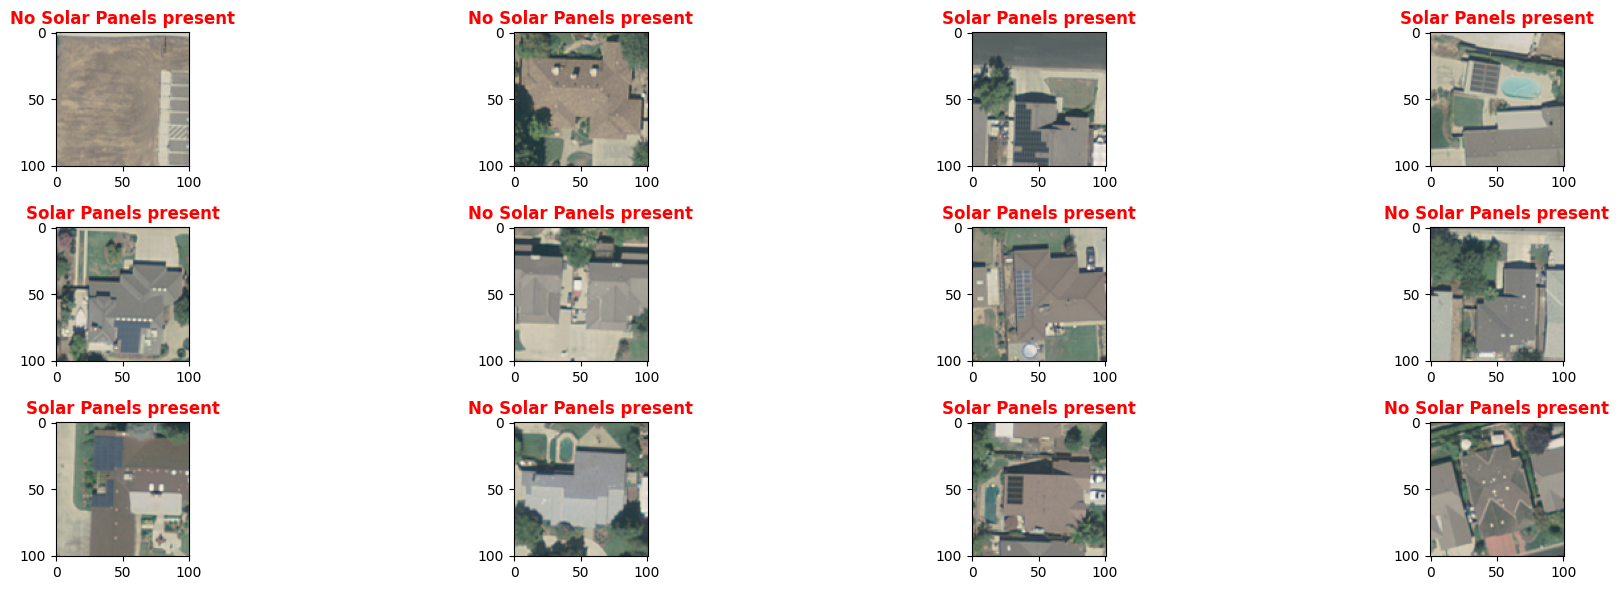

In [ ]:
plt.figure(figsize = (20,6))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.imshow(x[i])
  if y[i] == 0:
    title="No Solar Panels present"
  else:
    title="Solar Panels present"
  plt.title(title,color='r',weight='bold')
plt.tight_layout()
plt.show()

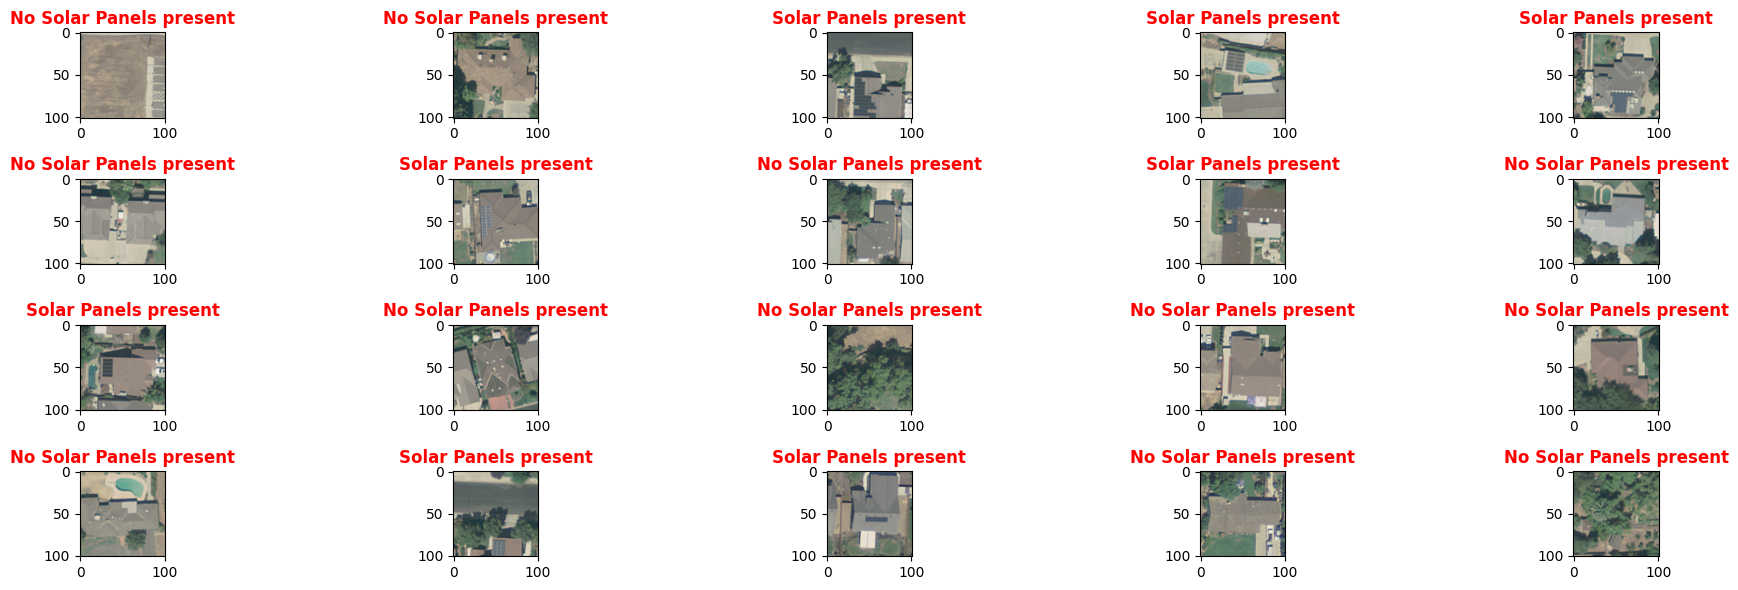

In [ ]:
plt.figure(figsize = (20,6))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x[i])
  if y[i] == 0:
    title="No Solar Panels present"
  else:
    title="Solar Panels present"
  plt.title(title,color='r',weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
#data shape
print('x shape: \n', x.shape)

x shape: 
 (1500, 101, 101, 3)


In [ ]:
#no.of samples
print('Distribution of y', np.bincount(y))

Distribution of y [995 505]


In [ ]:
#scaling pixel value btwn 0 and 1
x = x/255.0

In [ ]:
# define CNN
def build_model():
    '''
    Returns a Keras CNN model
    '''

    # define image dimensions
    IMAGE_HEIGHT = 101
    IMAGE_WIDTH = 101
    IMAGE_CHANNELS = 3

    # define a straightforward sequential neural network
    model = Sequential()

    # layer-1

    model.add(Conv2D(filters=32,
                     kernel_size=3,
                     activation='relu',
                     input_shape=(IMAGE_HEIGHT,
                                  IMAGE_WIDTH,
                                  IMAGE_CHANNELS)))

    #adding normalizing layer to improve the speed of training
    model.add(BatchNormalization())

    # layer-2
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-3
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # Pooling layer is to reduce dimentions of feature map by summerizing presence of features
    # max-pool - sends only imp data to next layer - here 2x2 matrix
    model.add(MaxPooling2D(pool_size=2))

    # layer-4
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-5
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # max-pool
    model.add(MaxPooling2D(pool_size=2))

    # layer-6
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-7
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # gobal-max-pool- performs downsampling by computing the maximum of the height and width dimensions of the input
    # using it as a substitute of Flatten before passing it to the final layer
    model.add(GlobalMaxPooling2D())

    # output layer
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
num_folds=3

In [ ]:

def cv_performance_assessment(X, y, num_folds, clf, random_seed=1):
    prediction_scores = np.empty(y.shape[0], dtype='object')

    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

    for train_index, val_index in kf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train = y[train_index]
        class_weight = {0: 505/1500, 1: 995/1500}

        # train the classifier
        training = clf.fit(x=X_train,
                           y=y_train,
                           class_weight=class_weight,
                           batch_size=32,
                           epochs=10,
                           shuffle=True,
                           verbose=1)

        # test the classifier
        y_val_pred_probs = clf.predict(X_val).reshape((-1, ))

        # save the predictions
        prediction_scores[val_index] = y_val_pred_probs

    return prediction_scores

In [ ]:
num_fols=3

In [ ]:
random_seed=1

In [ ]:
cnn=build_model()

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 99, 99, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 97, 97, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 95, 95, 128)       73856     
                                                                 
 batch_normalization_2 (Bat  (None, 95, 95, 128)       5

In [25]:
cnn_y_hat_prob=cv_performance_assessment(x,y,num_folds,cnn,random_seed=random_seed)

Epoch 1/10
32/32 [==============================] - 201s 6s/step - loss: 0.3148 - accuracy: 0.6370
Epoch 2/10
32/32 [==============================] - 196s 6s/step - loss: 0.1884 - accuracy: 0.8130
Epoch 3/10
32/32 [==============================] - 203s 6s/step - loss: 0.1151 - accuracy: 0.8980
Epoch 4/10
32/32 [==============================] - 198s 6s/step - loss: 0.0958 - accuracy: 0.9130
Epoch 5/10
32/32 [==============================] - 198s 6s/step - loss: 0.0789 - accuracy: 0.9310
Epoch 6/10
32/32 [==============================] - 205s 6s/step - loss: 0.0679 - accuracy: 0.9360
Epoch 7/10
32/32 [==============================] - 197s 6s/step - loss: 0.0309 - accuracy: 0.9780
Epoch 8/10
32/32 [==============================] - 197s 6s/step - loss: 0.0121 - accuracy: 0.9970
Epoch 9/10
32/32 [==============================] - 206s 6s/step - loss: 0.0067 - accuracy: 0.9980
Epoch 10/10
16/16 [==============================] - 28s 2s/step
Epoch 1/10
32/32 [==========================

In [26]:
df=pd.read_csv(x_train_label)
df["predicted_class"]=[1 if pred >=0.5 else 0 for pred in cnn_y_hat_prob]

In [27]:
print(df.columns)  # Print all column names in the DataFrame


Index(['id', 'label', 'predicted_class'], dtype='object')


In [28]:
# Get the values for FN, FP, TP, TN
fn = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 0)]['id'])      # False Negative
fp = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 1)]['id'])      # False Positive
tp = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 1)]['id'])      # True Positive
tn = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 0)]['id'])

In [29]:
def show_images(image_ids, num_images, title, color):
    '''
    Display a subset of images from the image_ids data
    '''
    rcParams['figure.figsize'] = 20, 4                                          # Adjusting figure size
    plt.figure()                                                                # Generating figure
    n = 1                                                                       # index where plot should apear in subplot
    for i in image_ids[0:num_images]:                                           # Run a loop for total number of images to display
        plt.subplot(1, num_images, n)                                           # Generate a subplot
        plt.imshow(x[i, :, :, :])                                               # Display the image
        plt.title('Image id: ' + str(i))                                        # Add title
        plt.axis('off')                                                         # Turn off the axis
        n+=1                                                                    # Incrememting index by 1
    plt.suptitle('\n'+title, fontsize=15, color = color, weight = 'bold')       # Adding main title to subplot
    plt.show()

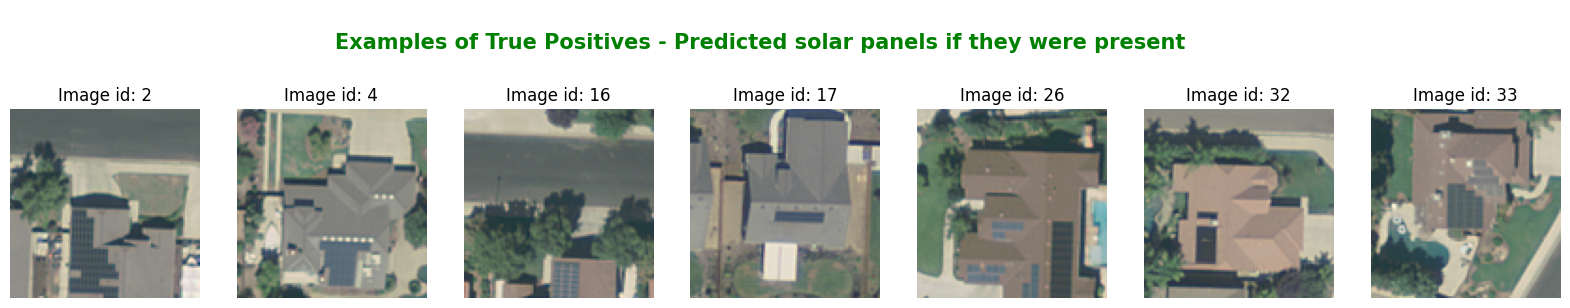

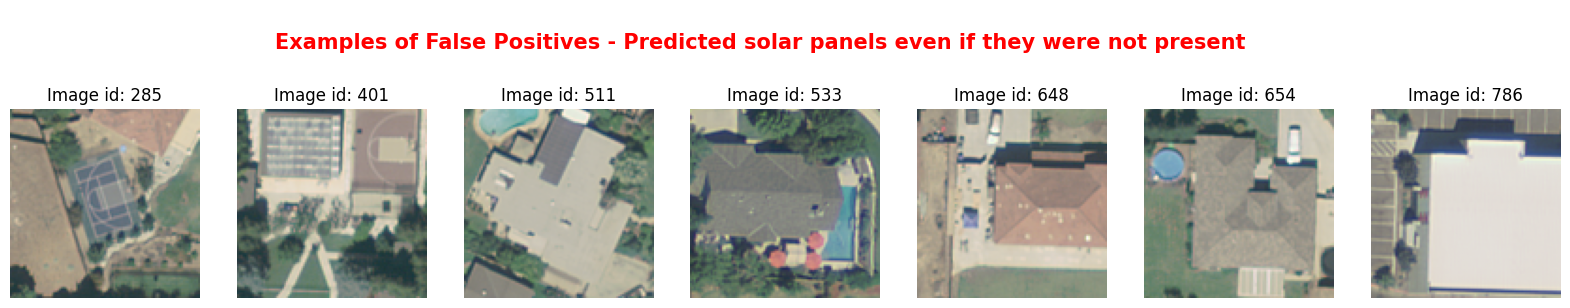

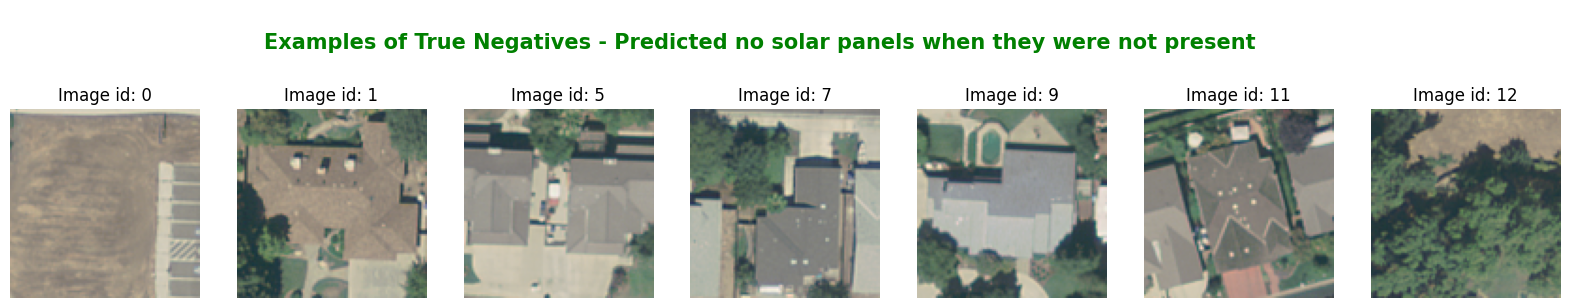

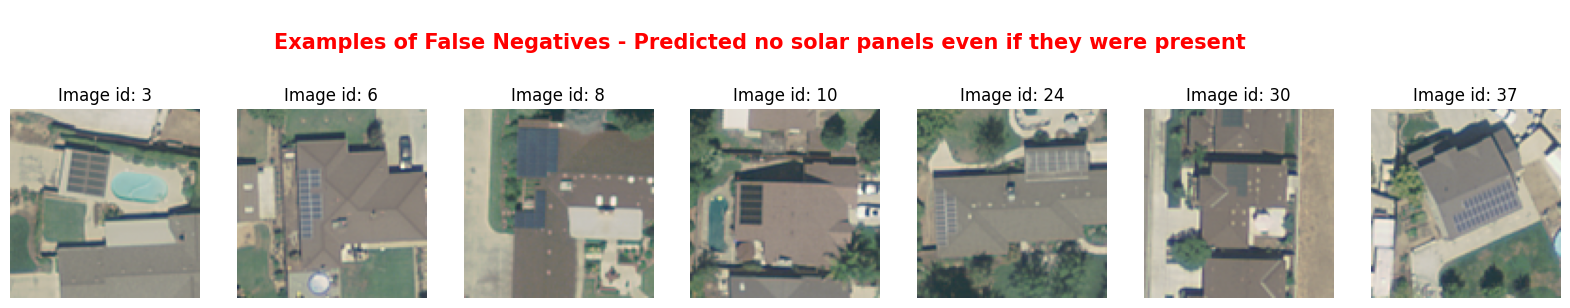

In [30]:
num_images = 7  # number of images to look at
show_images(tp, num_images, 'Examples of True Positives - Predicted solar panels if they were present', 'g')
show_images(fp, num_images, 'Examples of False Positives - Predicted solar panels even if they were not present', 'r')
show_images(tn, num_images, 'Examples of True Negatives - Predicted no solar panels when they were not present', 'g')
show_images(fn, num_images, 'Examples of False Negatives - Predicted no solar panels even if they were present', 'r')

In [39]:
def plot_roc(y_true, y_pred_cnn):
    '''
    Plots ROC curves for the CNN models.
    '''
    plt.figure(figsize=(35, 6))

    # ROC of CNN
    fpr, tpr, _ = roc_curve(y_true, y_pred_cnn, pos_label=1)
    auc = roc_auc_score(y_true, y_pred_cnn)
    legend_string = 'CNN Model - AUC = {:0.3f}'.format(auc)
    plt.plot(fpr, tpr, color='red', label=legend_string)

    # ROC of chance
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Chance - AUC = 0.5')

    # plot aesthetics
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()
    plt.title('ROC Curve', fontsize=10)
    pass

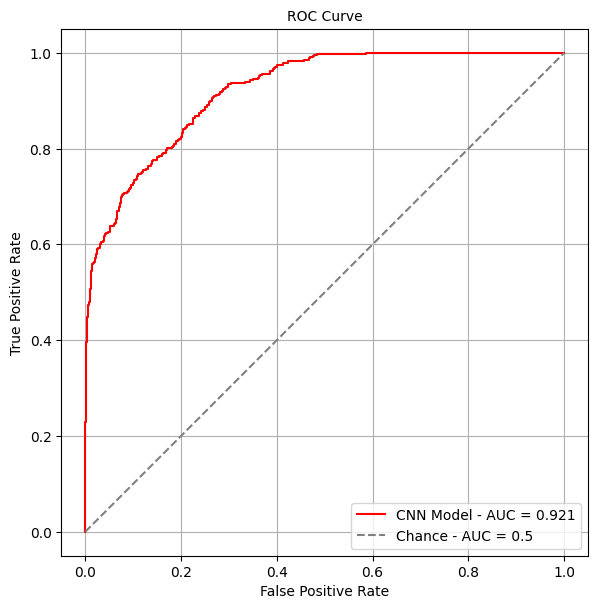

In [41]:
# plot ROC
y_pred = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]
plot_roc(y,  cnn_y_hat_prob)


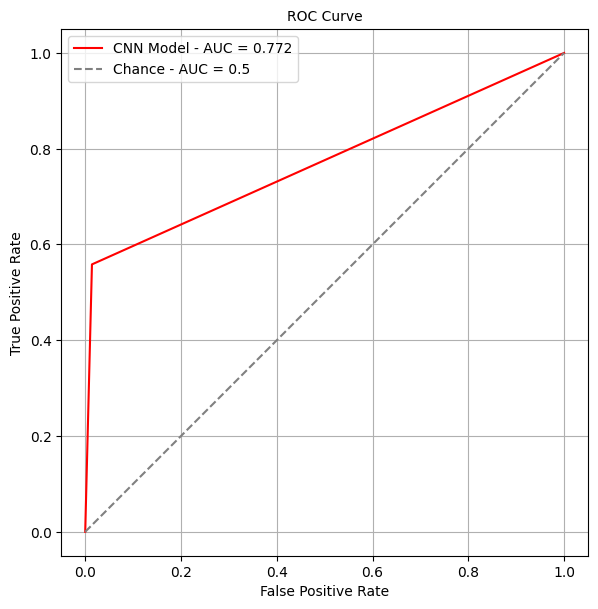

In [42]:
# plot ROC
y_pred = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]
plot_roc(y, y_pred)